## Val or Valence:
##### a measure of the mood of the song.  The greater the number, the more upbeat the tone.

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import json

# Load the .csv file
loadFile = "nueTopTens.csv"

# Create a dataframe and drop unused columns
songList = pd.read_csv(loadFile, encoding = "ISO-8859-1")
shortList = songList.drop(["nrgy", "dB", "live", "dur", "acous", "spch",
                          "title", "artist", "top genre", "bpm",
                          "dnce"], axis = 1)

# Convert columns to appropriate data types and print head to check work
shortList.astype({"year" : int, "val" : int})
shortList.head(3)

,index,year,val,pop,simplified genres
0,1,2010,80,83,folk
1,2,2010,64,82,hip hop
2,3,2010,71,80,pop


##### Line Graph Helpers

In [2]:
# Plot the average Val of all genres over the decade in a line graph
def getAvgLine(lineColor):
    avgLine = shortList.groupby(["year"]).mean()
    avgPlot = plt.plot(avgLine.index, avgLine["val"], color = lineColor,
                       label = "Overall Average", marker = "o")
    plt.title(f"Average Valence in All Genres Over the Last Decade")
    plt.xlabel("Year Measured")
    plt.ylabel("Average Valence Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# Plot the average Val of a specified genre over the decade in a line graph
def getGenreLine(genre, lineColor):
    nuList = shortList.loc[shortList["simplified genres"] == genre,:]
    valByYear = nuList.groupby(["year"]).mean()
    edmPlot = plt.plot(valByYear.index, valByYear["val"], color = lineColor,
                       label = genre.capitalize(), marker = ".")
    plt.title(f"Valence in {genre.capitalize()} over the Last Decade")
    plt.xlabel("Year Measured")
    plt.ylabel("Average Valence Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# Create a multi-line graph comparing specified genres to the average of
    # all genres over the course of the decade
def getCompVal(genres, colors = ["green", "yellow", "purple",
                                 "brown", "red", "blue"]):
    x = 0
    genresTwo = genres
    for genre in genres:
        genresTwo[x] = getGenreLine(genre, colors[0])
        colors.remove(colors[0])
        x += 1
    getAvgLine("black")
    plt.title(f"Average Valence in Compared Genres Over the Last Decade")


##### Scatter Plot Helpers

In [3]:
# create a scatterplot of a data-point's popularity vs it's Val score
def getValPopYear(year, pointColor):
    filterList = shortList[shortList["year"] == year]
    popularity = filterList["pop"]
    valence = filterList["val"]
    genrePlot = plt.scatter(popularity, valence, color = pointColor,
                            label = year, marker = ".")

def compValPopYear(years, colors):
    # add a line to convert year to int
    x = 0
    yearsTwo = years
    for year in years:
        yearsTwo[x] = getValPopYear(year, colors[0])
        colors.remove(colors[0])
        x += 1
    x = "Valence Relation to Popularity by"
    plt.title(f"{x} {years}")
    plt.xlabel("Pop Value")
    plt.ylabel("Valence Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

def getValPop(genre, pointColor):
    # add a line to convert year to int
    filterList = shortList[shortList["simplified genres"] == genre]
    popularity = filterList["pop"]
    valence = filterList["val"]
    genrePlot = plt.scatter(popularity, valence, color = pointColor,
                            label = genre.capitalize(), marker = ".")
    handles = [popularity, valence]
    x = "Valence Relation to Popularity by"
    plt.title(f"{x} {genre.capitalize()}")
    plt.xlabel("Pop Value")
    plt.ylabel("Valence Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)
              
# create a scatterplot of all data-points by Popularity vs Val score
def getTotValPop():
    # add a line to convert year to int
    filterList = shortList
    popularity = filterList["pop"]
    valence = filterList["val"]
    genrePlot = plt.scatter(popularity, valence, color = "black",
                            label = "All Genres", marker = "o")
    handles = [popularity, valence]
    plt.title(f"Valence Relation to Popularity")
    plt.xlabel("Pop Value")
    plt.ylabel("Valence Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# create a scatterplot of data-points in specified genres
    # by Popularity vs Val score 
def getCompValPop(genres, Colors = ["green", "yellow", "purple",
                                          "brown", "red", "blue"]):
    getTotValPop()
    x = 0
    genresTwo = genres
    for genre in genres:
        genresTwo[x] = getValPop(genre, colors[0])
        colors.remove(colors[0])
        x += 1
    plt.title(f"Valence Relation to Popularity by Compared Genres")

##### Comparing the Prevelence of Valence in Music over time:

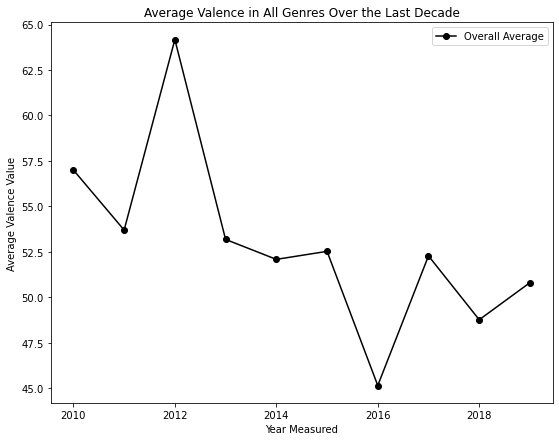

In [22]:
# Define the genres and the colors of the lines in the graph
genres = ["folk", "pop"]
colors = ["green", "blue"]

# Construct the graph
#getCompVal(genres, colors)

getAvgLine("black")
plt.savefig("AverageValence.png")

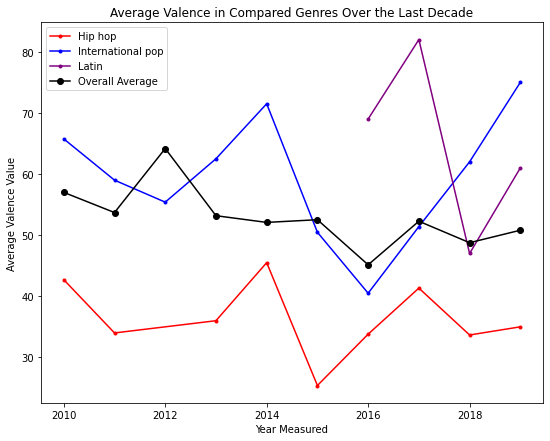

In [27]:
# Define the genres and the colors of the lines in the graph
genres = ["hip hop", "international pop", "latin"]
colors = ["red", "blue", 'purple']

# Construct the graph
getCompVal(genres, colors)

plt.savefig("AverageValenceInDiferingGenres.png")

##### Visualizing the relationship of Valence vs Popularity:

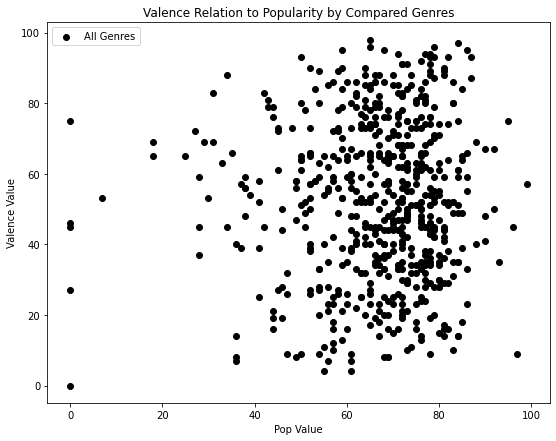

In [26]:
# Define the genres and the colors
genres = [""]
colors = ["red", "blue", "green"]

# Construct the scatter plot
getCompValPop(genres, colors)

plt.savefig("AverageValence.png")

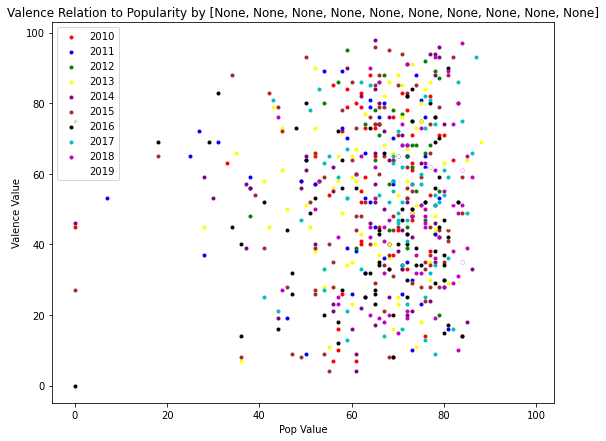

In [29]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
colors = ["red", "blue", "green", "yellow", "purple", "brown", "black", "c", "m", "w"]

compValPopYear(years, colors)

plt.savefig("AverageValence.png")

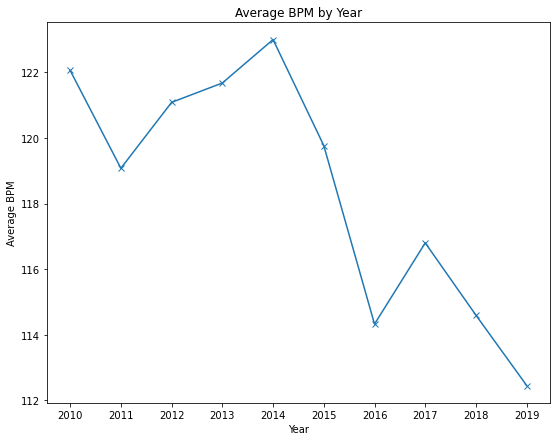

In [18]:
bpm_df = songList[["year", "bpm", "simplified genres"]]

bpm_table_agg = songList.groupby('year').agg(['mean','median','var','std','sem'])['bpm']

line_x = bpm_table_agg.index.values.tolist()
line_y = bpm_table_agg["mean"].tolist()

plt.plot(line_x,line_y, marker='x')
plt.xticks(line_x)
plt.xlabel("Year")
plt.ylabel("Average BPM")
plt.title("Average BPM by Year")
fig = plt.gcf()
fig.set_size_inches(9, 7)



Text(0, 0.5, 'BPM')

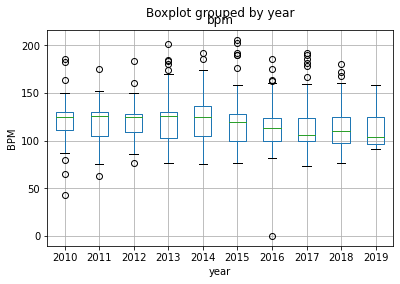

In [9]:
bpm_df.boxplot(column = ["bpm"], by = "year")
plt.ylabel("BPM")

Text(0, 0.5, 'Beats Per Minute(BPM)')

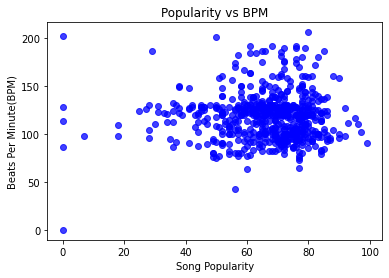

In [10]:
plt.scatter(songList['pop'], songList['bpm'], alpha = .75, color = 'blue')
plt.title("Popularity vs BPM")
plt.xlabel("Song Popularity")
plt.ylabel("Beats Per Minute(BPM)")

## Duration

In [11]:
spotdata = songList.drop(["nrgy", "dB", "live", "val", "acous", "spch",
                          "title", "artist", "top genre", "bpm",
                          "dnce"], axis = 1)

# Convert columns to appropriate data types and print head to check work
spotdata.astype({"year" : int, "dur" : int})
spotdata.head(3)

,index,year,dur,pop,simplified genres
0,1,2010,217,83,folk
1,2,2010,263,82,hip hop
2,3,2010,200,80,pop


### Duration Line Graph Helpers

In [12]:
def getDurAvgLine(lineColor):
    avgLine = spotdata.groupby(["year"]).mean()
    avgPlot = plt.plot(avgLine.index, avgLine["dur"], color = lineColor,
                       label = "Overall Average", marker = "o")
    plt.title(f"Average Duration in All Genres Over the Last Decade")
    plt.xlabel("Year Measured")
    plt.ylabel("Average Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# Plot the average Val of a specified genre over the decade in a line graph
def getDurGenreLine(genre, lineColor):
    nuList = spotdata.loc[spotdata["simplified genres"] == genre,:]
    valByYear = nuList.groupby(["year"]).mean()
    edmPlot = plt.plot(valByYear.index, valByYear["dur"], color = lineColor,
                       label = genre.capitalize(), marker = ".")
    plt.title(f"Valence in {genre.capitalize()} over the Last Decade")
    plt.xlabel("Year Measured")
    plt.ylabel("Average Valence Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# Create a multi-line graph comparing specified genres to the average of
    # all genres over the course of the decade
def getCompDur(genres, colors = ["green", "yellow", "purple",
                                 "brown", "red", "blue"]):
    x = 0
    genresTwo = genres
    for genre in genres:
        genresTwo[x] = getDurGenreLine(genre, colors[0])
        colors.remove(colors[0])
        x += 1
    getDurAvgLine("black")
    plt.title(f"Average Duration in Compared Genres Over the Last Decade")


### Duration Scatter Plot Graph Helpers


In [13]:
# create a scatterplot of a data-point's popularity vs it's Val score
def getDurPopYear(year, pointColor):
    filterList = spotdata[shortList["year"] == year]
    popularity = filterList["pop"]
    duration = filterList["dur"]
    genrePlot = plt.scatter(popularity, duration, color = pointColor,
                            label = year, marker = ".")

def compDurPopYear(years, colors):
    # add a line to convert year to int
    x = 0
    yearsTwo = years
    for year in years:
        yearsTwo[x] = getDurPopYear(year, colors[0])
        colors.remove(colors[0])
        x += 1
    x = "Duration Relation to Popularity by"
    plt.title(f"{x} {years}")
    plt.xlabel("Pop Value")
    plt.ylabel("Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

def getDurPop(genre, pointColor):
    # add a line to convert year to int
    filterList = spotdata[spotdata["simplified genres"] == genre]
    popularity = filterList["pop"]
    duration = filterList["dur"]
    genrePlot = plt.scatter(popularity, duration, color = pointColor,
                            label = genre.capitalize(), marker = ".")
    handles = [popularity, duration]
    x = "Duration Relation to Popularity by"
    plt.title(f"{x} {genre.capitalize()}")
    plt.xlabel("Pop Value")
    plt.ylabel("Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)
              
# create a scatterplot of all data-points by Popularity vs Val score
def getTotDurPop():
    # add a line to convert year to int
    filterList = spotdata
    popularity = filterList["pop"]
    duration = filterList["dur"]
    genrePlot = plt.scatter(popularity, duration, color = "black",
                            label = "All Genres", marker = "o")
    handles = [popularity, duration]
    plt.title(f"Duration Relation to Popularity")
    plt.xlabel("Pop Value")
    plt.ylabel("Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# create a scatterplot of data-points in specified genres
    # by Popularity vs Val score 
def getCompDurPop(genres, Colors = ["green", "yellow", "purple",
                                          "brown", "red", "blue"]):
    getTotDurPop()
    x = 0
    genresTwo = genres
    for genre in genres:
        genresTwo[x] = getDurPop(genre, colors[0])
        colors.remove(colors[0])
        x += 1
    plt.title(f"Duration Relation to Popularity by Compared Genres")

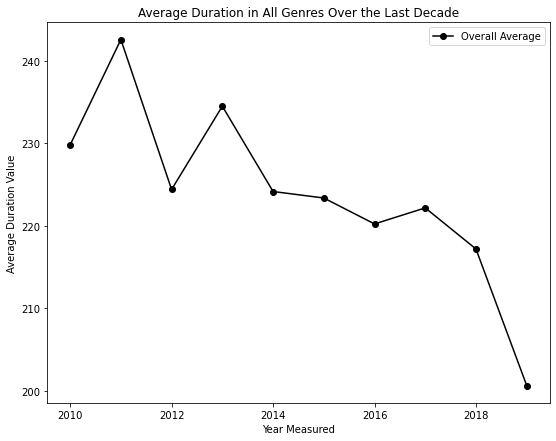

In [14]:
# Define the genres and the colors of the lines in the graph
genres = ["folk", "pop"]
colors = ["green", "blue"]

# Construct the graph
#getCompDur(genres, colors)

getDurAvgLine("black")

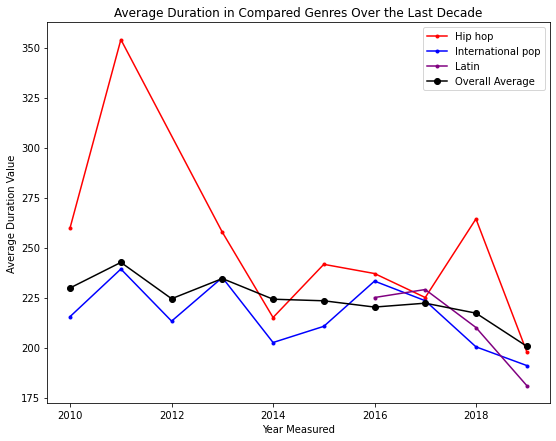

In [15]:
# Define the genres and the colors of the lines in the graph
genres = ["hip hop", "international pop", "latin"]
colors = ["red", "blue", 'purple']

# Construct the graph
getCompDur(genres, colors)

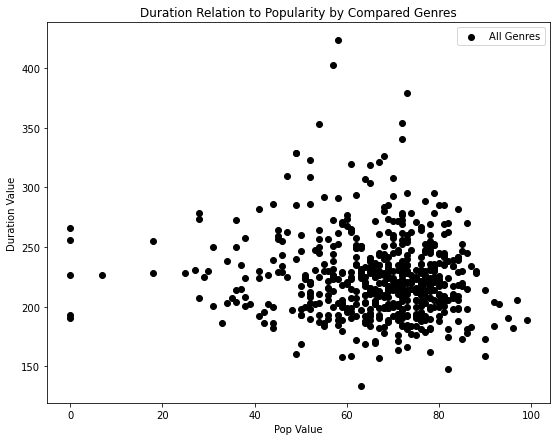

In [16]:
# Define the genres and the colors
genres = [""]
colors = ["red", "blue", "green"]

# Construct the scatter plot
getCompDurPop(genres, colors)
